# Assignment 2 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q3.ipynb`.

In [210]:
import numpy as np
import os
import random
from matplotlib import pyplot as plt
from PIL import Image
import cmath

## Load Data

In [88]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [89]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [90]:
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


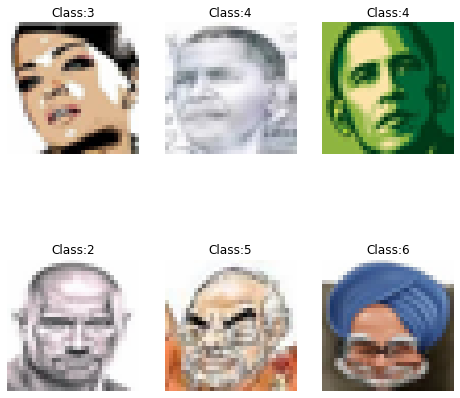

In [91]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [94]:
# write function
def eigen_of_data(data):
    matrix = data.reshape((data.shape[0],data.shape[1]*data.shape[2]*data.shape[3]))
    matrix = matrix.transpose()
    covariance_matrix = np.cov(matrix)
    return np.linalg.eig(covariance_matrix)  

In [95]:
eigen_values, eigen_vectors = eigen_of_data(X)

In [96]:
print('Eigen Values are: ',eigen_values)

Eigen Values are:  [ 8.05321772e+01+0.j  1.99819287e+01+0.j  1.29505097e+01+0.j ...
 -3.36317471e-17+0.j -8.50927212e-18+0.j -2.43623424e-17+0.j]


In [97]:
print('Eigen Vectors are: ',eigen_vectors)

Eigen Vectors are:  [[-2.29262301e-02+0.j -2.28110757e-02+0.j -3.62126864e-03+0.j ...
   1.03388755e-03+0.j  1.09459562e-03+0.j -4.14876717e-03+0.j]
 [-2.39795545e-02+0.j -2.51962301e-02+0.j -6.27780476e-03+0.j ...
   1.42844471e-04+0.j -2.56186534e-05+0.j -1.53311869e-04+0.j]
 [-2.49314471e-02+0.j -2.34632581e-02+0.j -9.36172255e-03+0.j ...
  -3.85958045e-04+0.j -2.18362220e-04+0.j -9.06892020e-04+0.j]
 ...
 [-2.01824285e-02+0.j -1.02655501e-02+0.j -2.08673808e-02+0.j ...
  -1.85029288e-02+0.j  1.70266006e-02+0.j -7.97256757e-03+0.j]
 [-2.05962277e-02+0.j -1.33415732e-02+0.j -2.75640239e-02+0.j ...
  -8.02702960e-03+0.j -2.04816149e-02+0.j -1.83459493e-02+0.j]
 [-2.16924564e-02+0.j -1.29333625e-02+0.j -2.93959031e-02+0.j ...
   1.49363060e-02+0.j  4.97740623e-04+0.j  1.13657198e-02+0.j]]


#### Compute eigen values and plot eigen value spectrum

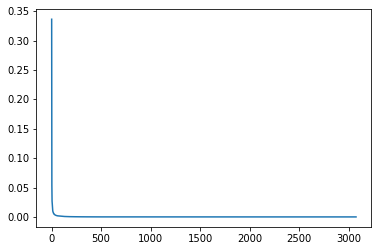

In [130]:
total_sum = 0.0
for i in range(len(eigen_values)):
    total_sum += eigen_values[i].real

x = []
y = []
for i in range(len(eigen_values)):
    x.append(i+1)
    y.append(eigen_values[i].real/total_sum)

plt.plot(x,y)
plt.show()

#### Plot the percentage of variances vs the number of principal components

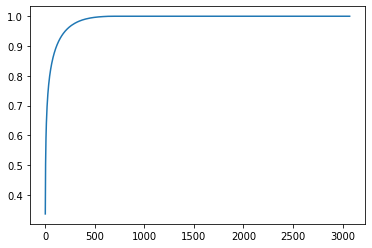

In [123]:
# plot variance vs components
cum = 0.0
y.clear()
for i in range(len(eigen_values)):
    cum += eigen_values[i].real
    y.append(cum/total_sum)

plt.plot(x,y)
plt.show()

#### Visualize eigen faces(eigen vectors)

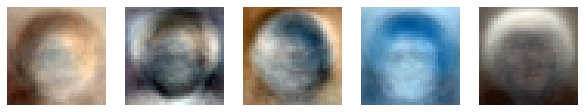

In [170]:
# Use the below sample code to visualize the eigen faces and reconstructed images (can write your own function as well)

def plot(image,H,W,C,indices):
    # indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image.T,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [random.randrange(12)+1 for i in range(5)]
plot(eigen_vectors.real,H,W,C, indices)

#### Reconstruction 

Original Images


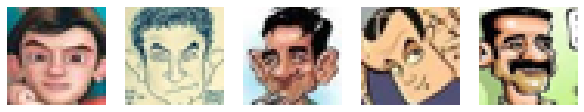

Reconstructed Images


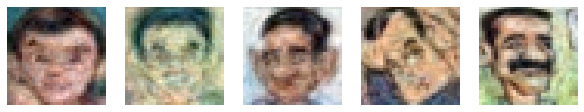

In [226]:
# # reconstruction
def reconstruction(X,k):
    reshaped_X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]*X.shape[3]))
    reshaped_X = reshaped_X.transpose()

    _,eigen_vectors = np.linalg.eig(np.cov(reshaped_X))

    eg = eigen_vectors.transpose()
    vecs = []
    for i in range(k):
        vecs.append(eg[i])

    vecs = np.array(vecs)

    mat = np.matmul(vecs,reshaped_X)
    reconstructed_matrix = np.matmul(vecs.transpose(),mat)

    return reshaped_X, reconstructed_matrix

reshaped_X, reconstruction_matrix = reconstruction(X,150)
print('Original Images')
plot(reshaped_X.real,H,W,C,indices)
print('Reconstructed Images')
plot(reconstruction_matrix.real,H,W,C,indices)

#### Plot data in 2D

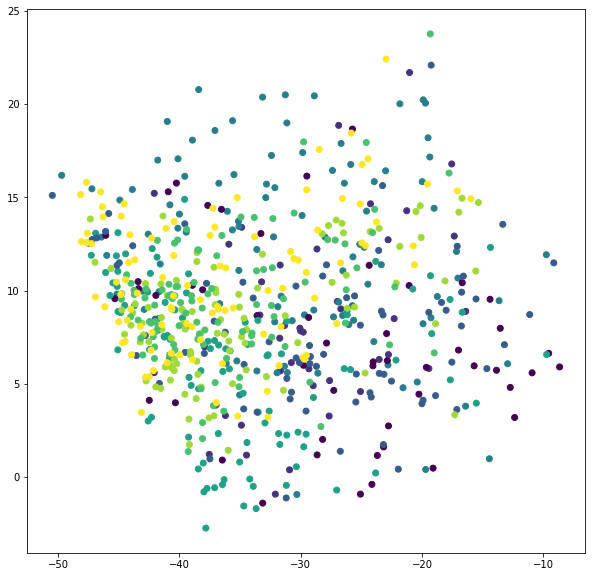

In [255]:
# plot data in 2D
dirpath = './IIIT-CFW/'
X,y = load_data(dirpath)

reshaped_X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]*X.shape[3]))
_, eigen_vecs = np.linalg.eig(np.cov(reshaped_X.transpose()))

eigen_vecs = eigen_vecs.transpose()
vecs = [] 
for i in range(2):
    vecs.append(eigen_vecs[i])

vecs = np.array(vecs).transpose()
coord = np.matmul(reshaped_X,vecs)

x_axis = []
y_axis = []
for p in coord:
    x_axis.append(p[0].real)
    y_axis.append(p[1].real)

fig = plt.figure(figsize = (10,10))
plt.scatter(x_axis,y_axis, c=y)
plt.show()

Observstion: As, the points of classes are too scatterd in the graph, so truly nothing much can be interepreted from the plot. 

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.

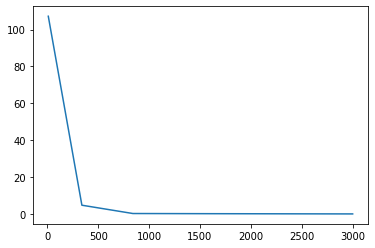

In [251]:
num_of_pca = [10,340,841,1570,3000]

x_axis = []
y_axis = []
for num in num_of_pca:
    m1, m2 = reconstruction(X,num)
    m1 = m1.transpose()
    m2 = m2.transpose()

    score = 0.0
    for i in range(672):
        sq1=0.0
        sq2=0.0
        for j in range(3072):
            sq1+=m1[i][j]**2
            sq2+=m2[i][j]**2
        
        score += abs(sq1-sq2)

    score/=672

    x_axis.append(num)
    y_axis.append(score)

plt.plot(x_axis,y_axis)
plt.show()

## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [173]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

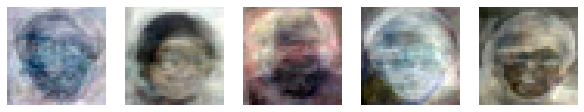

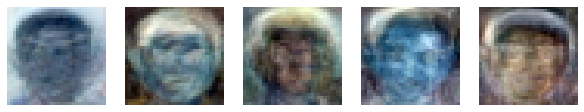

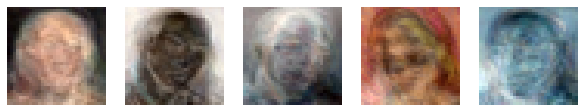

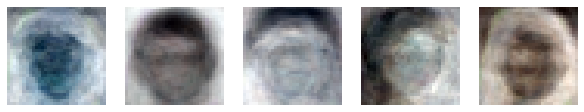

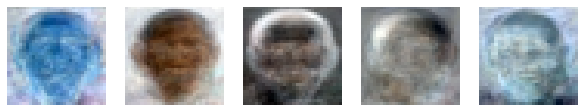

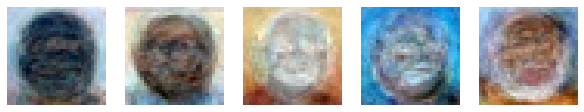

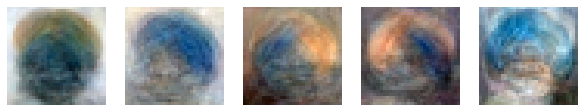

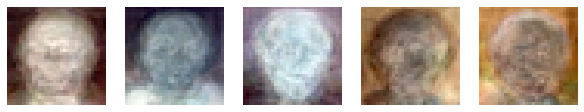

In [207]:
# visualize
reshaped_X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]*X.shape[3]))

# writing short forms for each of the class
AB = []
AK = []
DJ = []
AR = []
BO = []
NM = []
MS = []
VP = []

dir_path = './IIIT-CFW'
i = 0
for filename in sorted(os.listdir(dir_path)):
    if filename.endswith(".png"):
        im = load_image(os.path.join(dir_path,filename))
        y = filename.split('_')[0]
        if y == 'Amitabhbachan':
            AB.append(reshaped_X[i])
        elif y == 'AamirKhan':
            AK.append(reshaped_X[i])
        elif y == 'DwayneJohnson':
            DJ.append(reshaped_X[i])
        elif y == 'AishwaryaRai':
            AR.append(reshaped_X[i])
        elif y == 'BarackObama':
            BO.append(reshaped_X[i])
        elif y == 'NarendraModi':
            NM.append(reshaped_X[i])
        elif y == 'ManmohanSingh':
            MS.append(reshaped_X[i])
        elif y == 'VladimirPutin':
            VP.append(reshaped_X[i])
        i+=1

AB = np.array(AB).transpose()
AK = np.array(AK).transpose()
DJ = np.array(DJ).transpose()
AR = np.array(AR).transpose()
BO = np.array(BO).transpose()
NM = np.array(NM).transpose()
MS = np.array(MS).transpose()
VP = np.array(VP).transpose()

eig_AB, vec_AB = np.linalg.eig(np.cov(AB))
eig_AK, vec_AK = np.linalg.eig(np.cov(AK))
eig_DJ, vec_DJ = np.linalg.eig(np.cov(DJ))
eig_AR, vec_AR = np.linalg.eig(np.cov(AR))
eig_BO, vec_BO = np.linalg.eig(np.cov(BO))
eig_NM, vec_NM = np.linalg.eig(np.cov(NM))
eig_MS, vec_MS = np.linalg.eig(np.cov(MS))
eig_VP, vec_VP = np.linalg.eig(np.cov(VP))

vec_AB = vec_AB.transpose()
vec_AK = vec_AK.transpose()
vec_DJ = vec_DJ.transpose()
vec_AR = vec_AR.transpose()
vec_BO = vec_BO.transpose()
vec_NM = vec_NM.transpose()
vec_MS = vec_MS.transpose()
vec_VP = vec_VP.transpose()

def top_k(eig,vec,k):
    p = []
    for i in range(len(eig)):
        p.append((eig[i],vec[i]))
    
    p.sort(reverse=True)
    lst = []
    for i in range(k):
        lst.append(p[i][1])

    lst = np.array(lst).transpose()
    return lst


# taking 5 dominant vectors
k = 5

dom_AB = top_k(eig_AB,vec_AB,k)
dom_AK = top_k(eig_AB,vec_AK,k)
dom_DJ = top_k(eig_AB,vec_DJ,k)
dom_AR = top_k(eig_AB,vec_AR,k)
dom_BO = top_k(eig_AB,vec_BO,k)
dom_NM = top_k(eig_AB,vec_NM,k)
dom_MS = top_k(eig_AB,vec_MS,k)
dom_VP = top_k(eig_AB,vec_VP,k)

plot(dom_AB.real,H,W,C,[0,1,2,3,4])
plot(dom_AK.real,H,W,C,[0,1,2,3,4])
plot(dom_DJ.real,H,W,C,[0,1,2,3,4])
plot(dom_AR.real,H,W,C,[0,1,2,3,4])
plot(dom_BO.real,H,W,C,[0,1,2,3,4])
plot(dom_NM.real,H,W,C,[0,1,2,3,4])
plot(dom_MS.real,H,W,C,[0,1,2,3,4])
plot(dom_VP.real,H,W,C,[0,1,2,3,4])

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [225]:
# components required
def num_pca(eig):
    total_sum = 0.0
    for i in range(len(eig)):
        total_sum += eig[i].real
    
    cum = 0.0
    for i in range(len(eig)):
        cum += (eig[i].real/total_sum)
        if cum >= 0.9:
            num = i
            break
    
    # 1-based indexing
    return num+1

num_ab = num_pca(eig_AB)
num_ak = num_pca(eig_AK)
num_dj = num_pca(eig_DJ)
num_ar = num_pca(eig_AR)
num_bo = num_pca(eig_BO)
num_nm = num_pca(eig_NM)
num_ms = num_pca(eig_MS)
num_vp = num_pca(eig_VP)

num_entire = num_pca(eigen_values)

print('For class Amitabhbachan: ',num_ab)
print('For class AamirKhan: ',num_ak)
print('For class DwayneJohnson: ',num_dj)
print('For class AishwaryaRai: ',num_ar)
print('For class BarackObama: ',num_bo)
print('For class NarendraModi: ',num_nm)
print('For class ManmohanSingh: ',num_ms)
print('For class ValdimirPutin: ',num_vp)
print('For Entire dataset: ',num_entire)

For class Amitabhbachan:  21
For class AamirKhan:  24
For class DwayneJohnson:  28
For class AishwaryaRai:  36
For class BarackObama:  43
For class NarendraModi:  57
For class ManmohanSingh:  50
For class ValdimirPutin:  44
For Entire dataset:  115


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No, the number of components are different for each class and entire dataset. The reason being that faces have different attributes, so each need different number of principal components to represent the information. 


## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [70]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([random.randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


Regression Score: 0.7440787533666928 for n_components = 1
Regression Score: 0.7478884554781691 for n_components = 2
Regression Score: 0.7423683409841012 for n_components = 3
Regression Score: 0.7389040022326169 for n_components = 4
Regression Score: 0.7419767684526174 for n_components = 5
Regression Score: 0.7553267651912241 for n_components = 6
Regression Score: 0.7905256899048723 for n_components = 7
Regression Score: 0.7904840298919932 for n_components = 8
Regression Score: 0.7998127614059505 for n_components = 9
Regression Score: 0.8201095210235336 for n_components = 10
Regression Score: 0.8259143600243857 for n_components = 11
Regression Score: 0.8264317332650559 for n_components = 12
Regression Score: 0.8279780374532093 for n_components = 13
Regression Score: 0.8253456055076931 for n_components = 14
Regression Score: 0.8260904260244414 for n_components = 15
Regression Score: 0.8208806746811911 for n_components = 16
Regression Score: 0.817842706327123 for n_components = 17
Regress

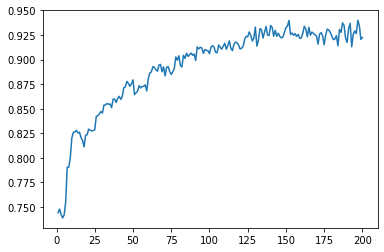

In [84]:
# code here -> we need to do train-test split right?
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

score = []
num_components = []
for i in range(1,201):
    pca = PCA(n_components=i)
    pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
    Xt = pipe.fit_transform(X)

    x_train, x_test, y_train, y_test = train_test_split(Xt, label, train_size = 0.8, random_state=42)
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    score.append(regr.score(x_test, y_test))
    num_components.append(i)
    print('Regression Score: {} for n_components = {}'.format(score[i-1],i))

plt.plot(num_components,score)
plt.show()

# Observation
As the number of principal components are increased, the regression score becomes better, because if more number of principal components are used to represent a data point, then more information is preserved.